In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2
import torchvision
import PIL, PIL.ImageOps, PIL.ImageEnhance, PIL.ImageDraw
from torchvision.transforms import Compose, CenterCrop, ToTensor, Resize
import torch.nn.functional as F
import os
import shutil
from tqdm import tqdm
from imagecorruptions import corrupt
from typing import Optional, Tuple
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from PIL import Image
from utils import load_model, AverageMeter, accuracy
from torch.autograd import Variable

import logging
seed = 11037
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [31]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [32]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


test_data = unpickle("./cifar-10-batches-py/test_batch")
data_batch_1 = unpickle("./cifar-10-batches-py/data_batch_1")
data_batch_2 = unpickle("./cifar-10-batches-py/data_batch_2")
data_batch_3 = unpickle("./cifar-10-batches-py/data_batch_3")
data_batch_4 = unpickle("./cifar-10-batches-py/data_batch_4")
data_batch_5 = unpickle("./cifar-10-batches-py/data_batch_5")

def get_data(input_data):
    data=[]
    label=[]
    for keys,values in input_data.items():    #用序列解包的方法遍历字典中的元素，输出的样式有所变化
        if keys == b'data':
            data = values

        if keys == b'labels':
            label = values

    return data,label
        
        
def imwrite_images(image):#
    image=image.reshape(-1,1024)
    #print(image.shape)
    r=image[0,:].reshape(32,32)#红色分量
    g=image[1,:].reshape(32,32)#绿色分量
    b=image[2,:].reshape(32,32)#蓝色分量
    img=np.zeros((32,32,3))
    #RGB还原成彩色图像
    img[:,:,0]=r
    img[:,:,1]=g
    img[:,:,2]=b

    return img





In [33]:
data1,label1 = get_data(data_batch_1) 
data2,label2 = get_data(data_batch_2) 
data3,label3 = get_data(data_batch_3) 
data4,label4 = get_data(data_batch_4) 
data5,label5 = get_data(data_batch_5)
test_data,test_label = get_data(test_data)

In [34]:
all_data = np.zeros((50000,32,32,3))
all_label = np.zeros((50000,10))

In [35]:
for i in range(10000):
    pic = imwrite_images(data1[i])
    all_data[i,:,:,:] = pic
    all_label[i,label1[i]] = 1

In [36]:
for i in range(10000):
    j =i+10000
    pic = imwrite_images(data2[i])
    all_data[j,:,:,:] = pic
    all_label[j,label2[i]] = 1

In [37]:
for i in range(10000):
    j =i+20000
    pic = imwrite_images(data3[i])
    all_data[j,:,:,:] = pic
    all_label[j,label3[i]] = 1

In [38]:
for i in range(10000):
    j =i+30000
    pic = imwrite_images(data4[i])
    all_data[j,:,:,:] = pic
    all_label[j,label4[i]] = 1

In [39]:
for i in range(10000):
    j =i+40000
    pic = imwrite_images(data5[i])
    all_data[j,:,:,:] = pic
    all_label[j,label5[i]] = 1

In [40]:
label_index = np.argmax(all_label,1)

In [41]:
print(sum(label_index == 0))
print(sum(label_index == 1))
print(sum(label_index == 2))
print(sum(label_index == 3))
print(sum(label_index == 4))
print(sum(label_index == 5))
print(sum(label_index == 6))
print(sum(label_index == 7))
print(sum(label_index == 8))
print(sum(label_index == 9))

5000
5000
5000
5000
5000
5000
5000
5000
5000
5000


In [42]:
all_data = all_data.astype('uint8')

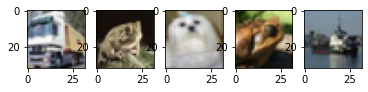

In [43]:
index = 1
plt.subplot(151)
plt.imshow(all_data[index])
plt.subplot(152)
plt.imshow(all_data[10000+index])
plt.subplot(153)
plt.imshow(all_data[20000+index])
plt.subplot(154)
plt.imshow(all_data[30000+index])
plt.subplot(155)
plt.imshow(all_data[40000+index])
plt.show()

In [45]:
all_corr_data = np.zeros([15*50000,32,32,3])

In [ ]:
for i in range(15):
    for j in range(50000):
        
        corrupted = corrupt(all_data[j], corruption_number=i, severity=2)
        all_corr_data[i*50000+j] = corrupted

In [17]:
all_corr_data = all_corr_data.astype('uint8')

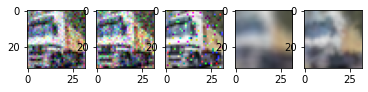

In [18]:
index = 1
plt.subplot(151)
plt.imshow(all_corr_data[index])
plt.subplot(152)
plt.imshow(all_corr_data[50000+index])
plt.subplot(153)
plt.imshow(all_corr_data[2*50000+index])
plt.subplot(154)
plt.imshow(all_corr_data[3*50000+index])
plt.subplot(155)
plt.imshow(all_corr_data[4*50000+index])
plt.show()

In [ ]:
np.save('all_corr_data.npy',all_corr_data)